# Abstract
This project aims to analyze the spending patterns of 50 startup companies across **R&D**, **Administration**, and **Marketing** to predict their **profits**. By leveraging various linear machine learning models, identify the best predictor of profit based on these expenses. This analysis will aid in understanding the key drivers of profit and optimizing spending strategies.

# Introduction
In the competitive world of startups, allocating resources effectively is critical for maximizing profit. This dataset provides insights into the spending patterns of startups and their corresponding profits. The objective is to determine how investments in R&D, Administration, and Marketing contribute to profit and to develop a reliable predictive model using linear regression techniques.

# Libraries
To ensure smooth execution, load the following Python libraries:
- `pandas` for data manipulation.
- `numpy` for numerical computations.
- `matplotlib` and `seaborn` for visualizations.
- `sklearn` for implementing and evaluating machine learning models.

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Print library versions
print("Library Versions:")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"sklearn: {sklearn.__version__}")
print(f"matplotlib: {plt.matplotlib.__version__}")
print(f"seaborn: {sns.__version__}")

Library Versions:
pandas: 2.2.2
numpy: 1.26.4
sklearn: 1.5.1
matplotlib: 3.9.2
seaborn: 0.13.2


In [3]:
# load the data into a pandas DataFrame
path_to_csv = "C:\\_D\\_Python\\Exposys Data Labs\\50_Startups.csv"
data = pd.read_csv(path_to_csv)

## EDA
Explore the dataset to uncover patterns and relationships:
- Analyze the distribution of each feature using histograms and boxplots.
- Visualize correlations between features with a heatmap.
- Examine scatterplots of each feature against the target variable to identify potential predictors of profit.

In [4]:
# Display the first few rows to understand the structure of the dataset
# Preview helps to verify data loading and understand the available columns and data
print("Dataset Preview:")
data.head()

Dataset Preview:


,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


## Overview of the Dataset
The dataset consists of the following features:
- **R&D Spend**: Amount spent on research and development.
- **Administration**: Amount spent on administrative tasks.
- **Marketing Spend**: Amount spent on marketing campaigns.
- **Profit**: The target variable representing profit gained.

In [5]:
# Check for missing values
print("\nMissing Values in Each Column:")
data.isnull().sum()


Missing Values in Each Column:


R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [6]:
# Check the data types of each column
print("\nData Types:")
data.dtypes


Data Types:


R&D Spend          float64
Administration     float64
Marketing Spend    float64
Profit             float64
dtype: object

In [7]:
# List column labels
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

In [8]:
# Descriptive statistics to understand data distribution to provide basic summary statistics such as mean, median, and standard deviation
print("\nDescriptive Statistics:")
data.describe()


Descriptive Statistics:


,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Initial exploration reveals the dataset contains 50 rows and 4 columns, with no apparent missing values. The data is numeric and well-suited for regression analysis.

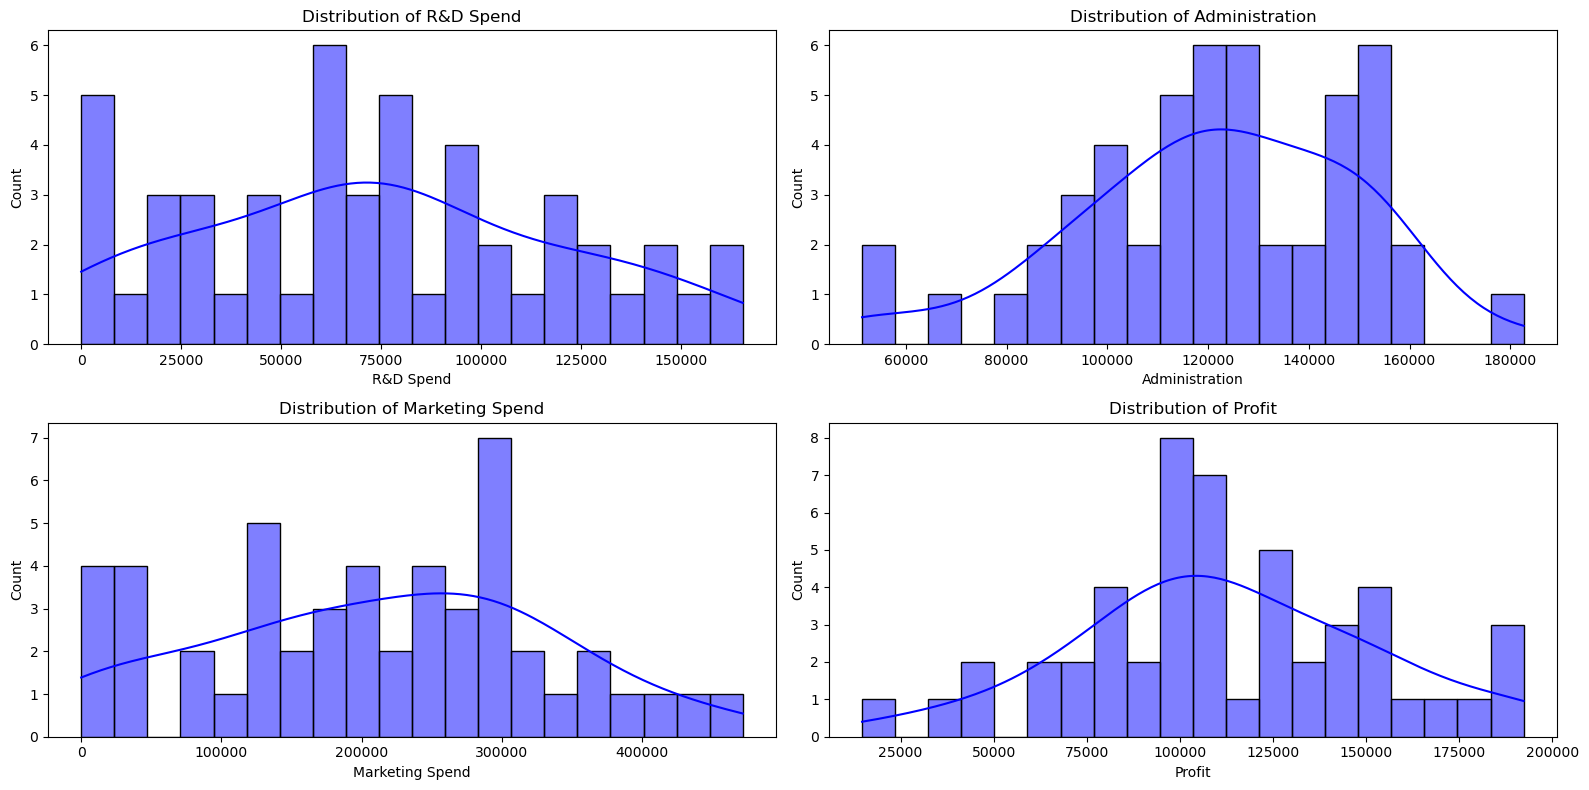

In [9]:
# Visualize distributions of individual features
plt.figure(figsize=(16, 8))
for i, column in enumerate(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']):
    plt.subplot(2, 2, i+1)
    sns.histplot(data[column], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()
# Histograms show the frequency distribution for each feature and the target


Pairplot for Features and Target:


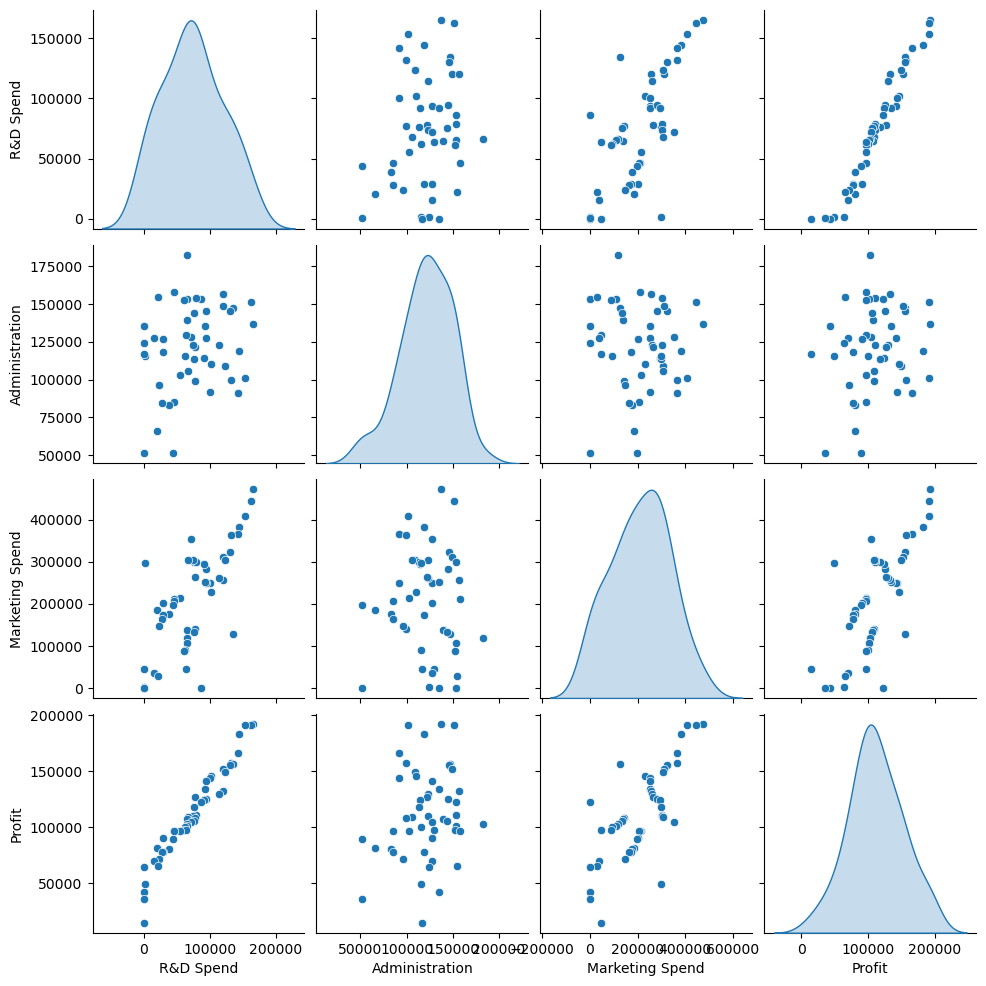

In [10]:
# Pairplot to visualize pairwise relationships
print("\nPairplot for Features and Target:")
sns.pairplot(data, diag_kind='kde')
plt.show()
# Pairwise relationships are important to understand linear dependencies

In [11]:
# Correlation Matrix to evaluate linear relationships
print("\nCorrelation Matrix:")
correlation_matrix = data.corr()
correlation_matrix


Correlation Matrix:


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


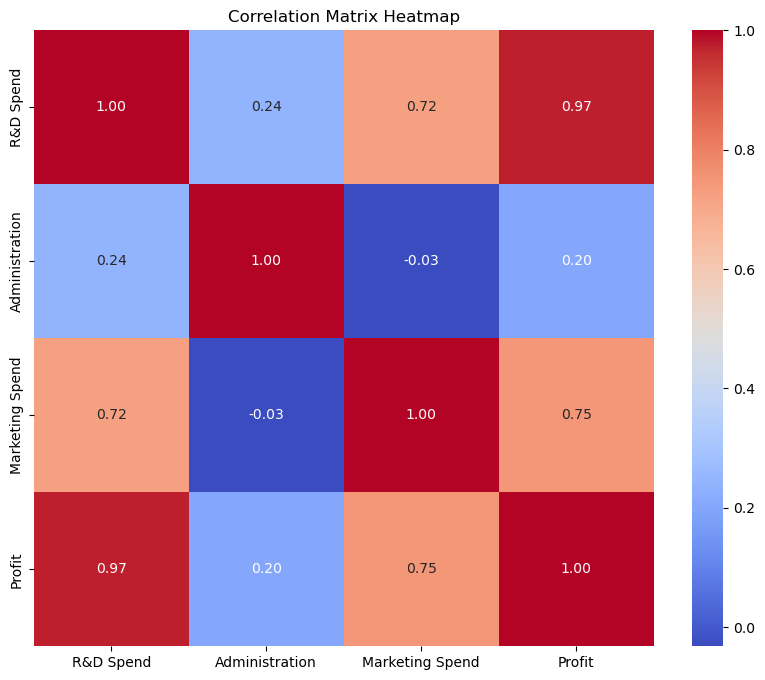

In [12]:
# Visualize correlation matrix using heatmap, an intuitive visualization of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

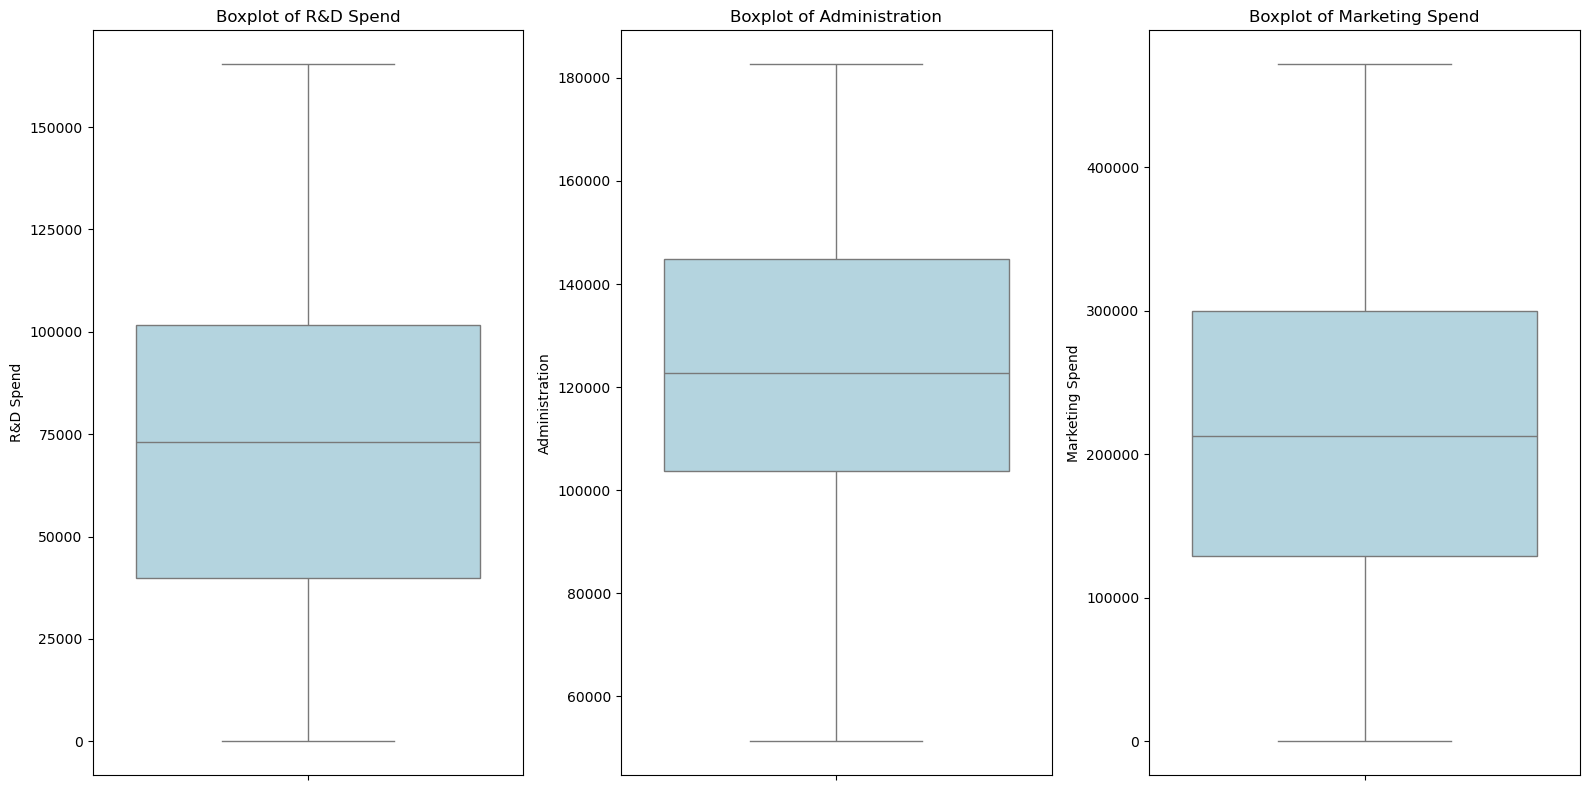

In [13]:
# Boxplot to detect outliers in spends
plt.figure(figsize=(16, 8))
for i, column in enumerate(['R&D Spend', 'Administration', 'Marketing Spend']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=data[column], color='lightblue')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

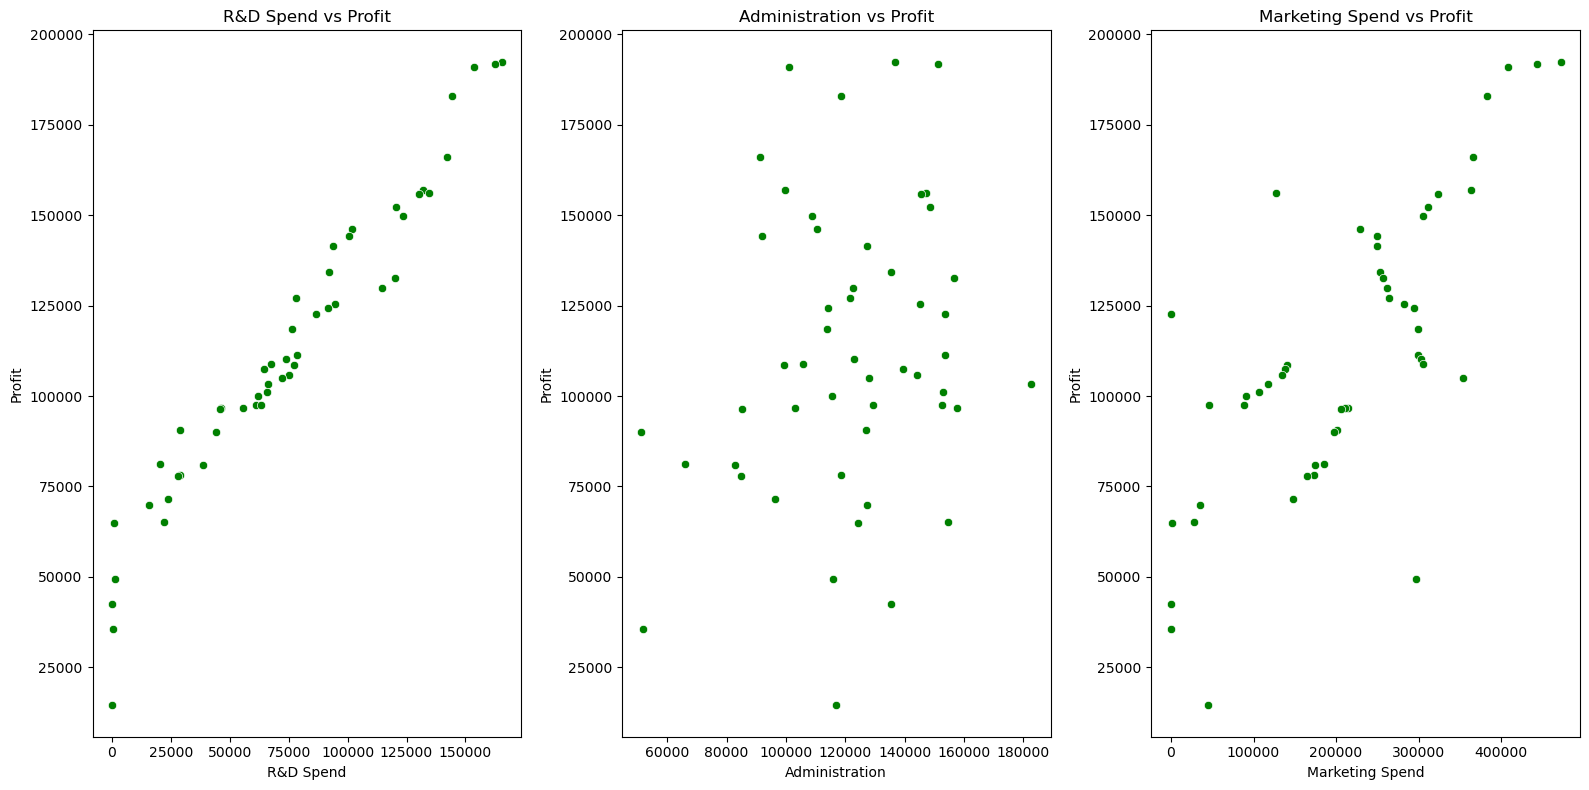

In [14]:
# Analyze relationships between features and target variable
plt.figure(figsize=(16, 8))
for i, column in enumerate(['R&D Spend', 'Administration', 'Marketing Spend']):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=data[column], y=data['Profit'], color='green')
    plt.title(f'{column} vs Profit')
plt.tight_layout()
plt.show()
# Scatterplots help visualize the impact of each feature on the target variable

### EDA Summary
After performing the exploratory data analysis (EDA) on the dataset, the following key insights were derived:
- `R&D` spend shows a high correlation with the target variable `Profit`, indicating its importance.
- `Marketing Spend` has a weaker but noticeable relationship with Profit.
- `Administration` spend has no clear correlation with Profit.
- No outliers were detected in the data based on the boxplots of the features.
- The dataset is complete with no missing values, ensuring data integrity.
- These insights can guide further analysis and model development to predict profit effectively based on the spending patterns.

### Feature Selection and Target Variable

In [15]:
X = data[['R&D Spend', 'Administration', 'Marketing Spend']]
y = data['Profit']

In [16]:
# Split the dataset into training and testing sets, with 20% of the data reserved for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature scaling
Initialize a scaler to normalize feature values for better model performance, especially for models sensitive to feature scaling like Ridge and Lasso.

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelling
## Baseline model
A simple linear regression model was built using only R&D Spend to establish a baseline performance.

In [18]:
# Baseline model using only R&D spend to predict Profit
X_baseline = X_train[['R&D Spend']]
X_baseline_test = X_test[['R&D Spend']]
scaler_baseline = StandardScaler()
X_baseline_scaled = scaler_baseline.fit_transform(X_baseline)
X_baseline_test_scaled = scaler_baseline.transform(X_baseline_test)

baseline_model = LinearRegression()
baseline_model.fit(X_baseline_scaled, y_train)
y_baseline_pred = baseline_model.predict(X_baseline_test_scaled)

baseline_r2 = r2_score(y_test, y_baseline_pred)
print(f"Baseline R2 score using only X: {baseline_r2}")

Baseline R2 score using only X: 0.9265108109341951


## Model Selection
Define a dictionary of linear models (Linear Regression, Ridge, and Lasso) to evaluate on the dataset.

In [19]:
# Models to train
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1)
}

# Dictionary to store results
results = {}

In [20]:
# Training and evaluation
for model_name, model in models.items():
    # Cross-validation to evaluate the model's performance and stability on the training data.
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    
    # Fit the model
    model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = model.predict(X_test_scaled)
    
    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[model_name] = {
        'Cross-Validation R2': np.mean(cv_scores),
        'Test MSE': mse,
        'Test R2': r2
    }

# Visualization of Model Performance
- Plot residuals to check the distribution of errors and assess model assumptions.
- Create scatterplots of predicted vs. actual profit values for each model.
- Highlight differences in performance visually for easier comparison.

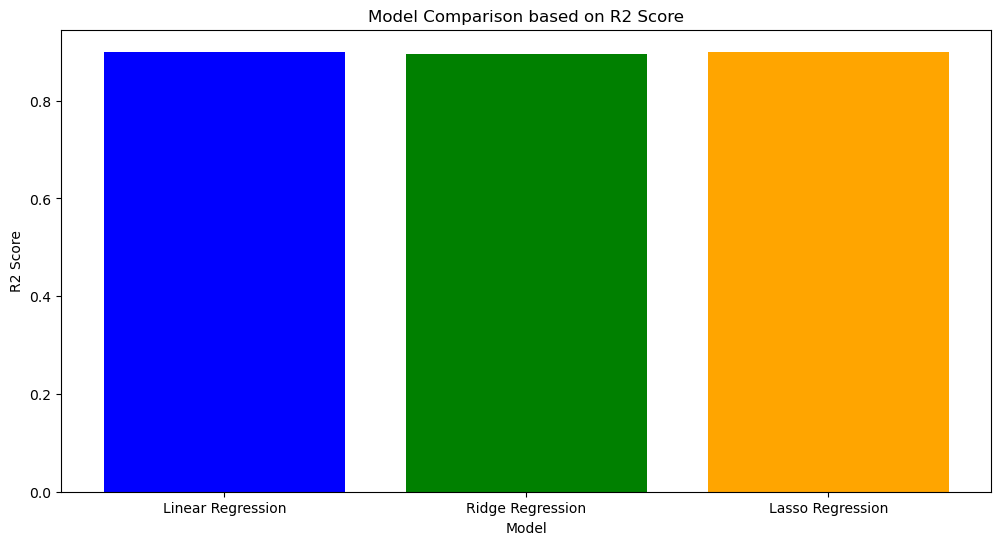

In [21]:
# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T

# Bar plot
# Create a bar chart to compare the R2 scores of different models, helping to visually identify the best-performing model.
plt.figure(figsize=(12, 6))
plt.bar(results.keys(), results_df['Test R2'], color=['blue', 'green', 'orange'])
plt.title('Model Comparison based on R2 Score')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.show()

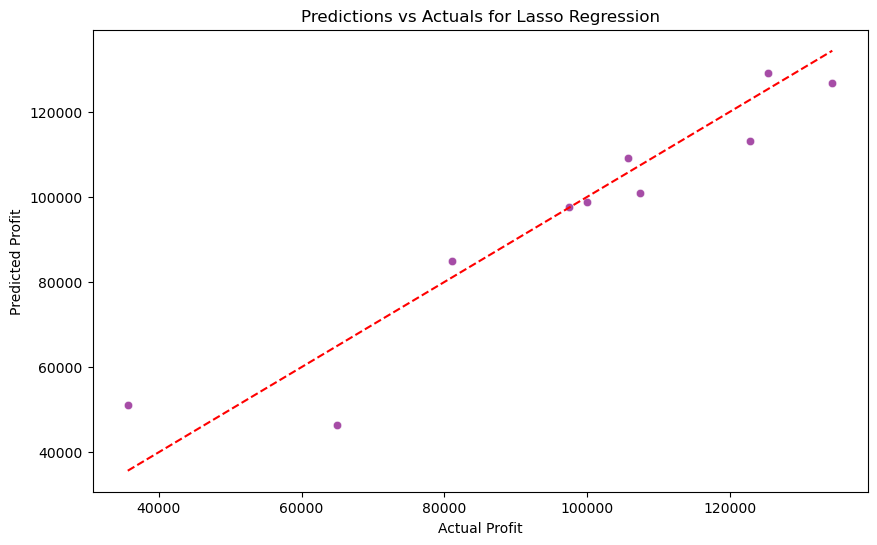

In [22]:
# Scatter plot of predictions vs actuals for the best model
best_model_name = max(results, key=lambda k: results[k]['Test R2'])
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_scaled)

# Generate a scatter plot to compare predicted values against actual values for the best model, with a red line representing perfect predictions.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_best, color='purple', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title(f'Predictions vs Actuals for {best_model_name}')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.show()

In [23]:
# Print results
print("Model Performance:")
print(results_df)
print(f"\nBest model: {best_model_name}")

Model Performance:
                   Cross-Validation R2      Test MSE   Test R2
Linear Regression             0.940059  8.092632e+07  0.900065
Ridge Regression              0.937040  8.424212e+07  0.895971
Lasso Regression              0.940059  8.092451e+07  0.900068

Best model: Lasso Regression


# Hyperparameter effects on performance

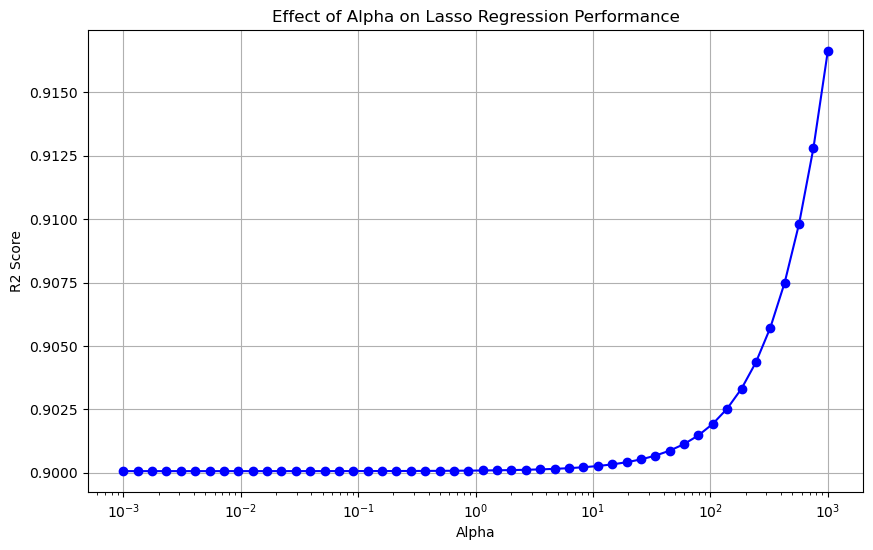

In [24]:
# Hyperparameter tuning for alpha
if best_model_name in ['Ridge Regression', 'Lasso Regression']:
    # Define a range of alpha values to test for Ridge or Lasso regression, spanning from very small to very large values on a logarithmic scale.
    alphas = np.logspace(-3, 3, 50)
    r2_scores = []

    for alpha in alphas:
        tuned_model = Ridge(alpha=alpha) if best_model_name == 'Ridge Regression' else Lasso(alpha=alpha)
        tuned_model.fit(X_train_scaled, y_train)
        y_pred_tuned = tuned_model.predict(X_test_scaled)
        r2_scores.append(r2_score(y_test, y_pred_tuned))

    # Plot the relationship between alpha values and R2 scores, helping to identify the optimal alpha value for regularization.
    plt.figure(figsize=(10, 6))
    plt.plot(alphas, r2_scores, marker='o', linestyle='-', color='blue')
    plt.xscale('log')
    plt.title(f'Effect of Alpha on {best_model_name} Performance')
    plt.xlabel('Alpha')
    plt.ylabel('R2 Score')
    plt.grid(True)
    plt.show()

# Hyperparameter Tuning and Optimization
- Conduct GridSearchCV on Ridge or Lasso regression models to fine-tune regularization parameters.
- Use cross-validation to ensure robustness and selected the model with the best performance.

In [25]:
# GridSearchCV for fine-tuning
from sklearn.model_selection import GridSearchCV
if best_model_name in ['Ridge Regression', 'Lasso Regression']:
    param_grid = {'alpha': np.logspace(-3, 3, 50)}
    grid_search = GridSearchCV(best_model, param_grid, scoring='r2', cv=5)
    grid_search.fit(X_train_scaled, y_train)
    print(f"Best parameters from GridSearchCV: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_
    y_pred_optimized = best_model.predict(X_test_scaled)
    print(f"Optimized R2 Score: {r2_score(y_test, y_pred_optimized)}")

Best parameters from GridSearchCV: {'alpha': 1.151395399326447}
Optimized R2 Score: 0.9000907353751055


### Additional (prediction of Profit based on a user defined input)

# Conclusion
From the analysis:
- R&D Spend emerged as the most significant predictor of profit as the correlation heatmap and pairwise scatterplots highlighted the dominance of R&D Spend as a driver of profit.
- Administration Spend had little to no significant correlation with profit, suggesting that its impact is less direct or negligible in this dataset.
- The Regularized Linear Regression model with R&D and Marketing spends provided the best balance of simplicity and performance, especially in reducing overfitting.
- GridSearchCV for Ridge and Lasso regression identified optimal regularization parameters, leading to slightly better performance and generalization.

Limitations:
- The dataset only includes three spending categories, which may not fully capture all factors influencing profit.
- With only 50 data points, the findings may lack statistical robustness.

Future work:
- Collect more data to confirm findings and enhance the model.
- Explore non-linear models or advanced techniques such as ensemble learning for better predictions.